<a href="https://colab.research.google.com/github/Vakurin/SuperResolutionGAN-TF2.0/blob/master/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Make default version tf2.0 in colab
%tensorflow_version 2.x
%matplotlib inline
!pip install tensorlayer 

import os
import tensorflow as tf
import zipfile

TensorFlow 2.x selected.
     |████████████████████████████████| 368kB 2.8MB/s 
     |████████████████████████████████| 3.3MB 9.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


## Import Functions

In [2]:
!git clone https://github.com/Vakurin/SuperResolutionGAN-TF2.0.git
%cd SuperResolutionGAN-TF2.0/

from models import model_generator
from dataset import get_train_data
from plot_show import show_plot_results

Cloning into 'SuperResolutionGAN-TF2.0'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 28 (delta 7), reused 22 (delta 4), pack-reused 0
Unpacking objects: 100% (28/28), done.
/content/SuperResolutionGAN-TF2.0
TensorFlow Version: 2.1.0


## Colab Settings

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Global Settings

In [0]:
IMG_HR_SIZE = 256
IMG_LR_SIZE = 64
BATCH_SIZE = 4

PATH_FOLDER_WITH_IMAGES = '/tmp/Dataset/DIV2K_train_HR/'

## Unzipping Files ~2-3min

In [5]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/SRGAN/DIV2K_train_HR.zip", 'r')
zip_ref.extractall("/tmp/Dataset")
zip_ref.close()

print('total training test images:', len(os.listdir(PATH_FOLDER_WITH_IMAGES)))

total training test images: 800


## Load Dataset

In [6]:
train_ds = get_train_data(IMG_HR_SIZE, IMG_LR_SIZE, BATCH_SIZE, PATH_FOLDER_WITH_IMAGES)

[TL] Match file list = ['0476.png', '0342.png', '0682.png', '0066.png', '0192.png', '0323.png', '0720.png', '0215.png', '0390.png', '0509.png', '0311.png', '0444.png', '0493.png', '0605.png', '0167.png', '0511.png', '0482.png', '0011.png', '0131.png', '0719.png', '0572.png', '0226.png', '0184.png', '0092.png', '0245.png', '0495.png', '0102.png', '0216.png', '0022.png', '0258.png', '0601.png', '0197.png', '0012.png', '0089.png', '0564.png', '0069.png', '0583.png', '0568.png', '0453.png', '0273.png', '0563.png', '0616.png', '0112.png', '0309.png', '0064.png', '0201.png', '0346.png', '0079.png', '0499.png', '0684.png', '0044.png', '0431.png', '0640.png', '0377.png', '0607.png', '0338.png', '0727.png', '0191.png', '0587.png', '0312.png', '0452.png', '0454.png', '0295.png', '0354.png', '0269.png', '0470.png', '0791.png', '0136.png', '0030.png', '0488.png', '0708.png', '0347.png', '0745.png', '0328.png', '0395.png', '0039.png', '0063.png', '0076.png', '0179.png', '0221.png', '0383.png', '026

## Load Models

In [0]:
FIRST_MODEL_GAN  = '/content/drive/My Drive/SRGAN/models/pre-train-model-3000.h5'
SECOND_MODEL_GAN = '/content/drive/My Drive/SRGAN/models/generator-54.h5'

pre_generated = model_generator()
gan_generated = model_generator()

pre_generated.load_weights(FIRST_MODEL_GAN)
gan_generated.load_weights(SECOND_MODEL_GAN)

## Results

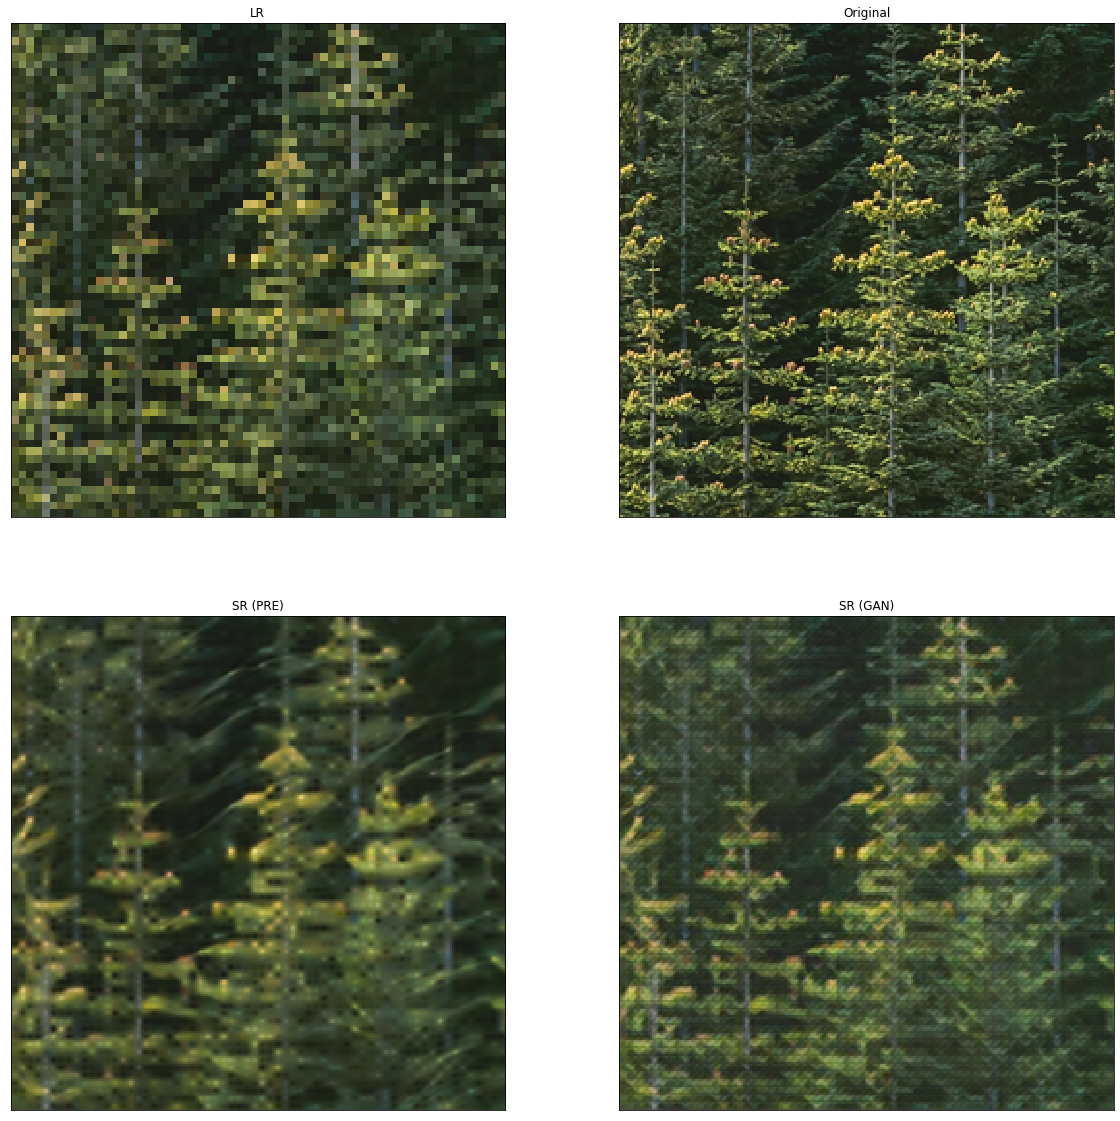

In [8]:
show_plot_results(train_ds, pre_generated, gan_generated)